In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, InputLayer

import pandas as pd
import numpy as np
import os
import tensorflow as tf

#DATA NORMALIZATION(STANDARDISATION)
from sklearn.preprocessing import MinMaxScaler

#DATA PLOTTING
import matplotlib.pyplot as plt

#FOR PERFORMANCE METRICS ANALYSIS.
from keras.optimizers import Adam
from keras.losses import  MeanSquaredError
from keras.metrics import  RootMeanSquaredError

#SAVING AND LOADING MODEL
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

#https://colab.research.google.com/drive/1HxPsJvEAH8L7XTmLnfdJ3UQx7j0o1yX5?usp=sharing#scrollTo=jAgqCN2XEhNs  this is the path to the csv file zipped, not the directory.

2023-10-31 14:22:51.545339: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 14:22:51.953746: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 14:22:51.953809: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 14:22:51.955729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 14:22:52.155303: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 14:22:52.157260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
model = Sequential([Input((3, 1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)])

model.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.0001),
              metrics=[RootMeanSquaredError()])


In [4]:

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)
csv_path


'/home/kering/.keras/datasets/jena_climate_2009_2016.csv'

In [5]:
df = pd.read_csv(csv_path)
(df.head(20))

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [6]:
df = df[5::6]
df


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [10]:

df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


(420551,)

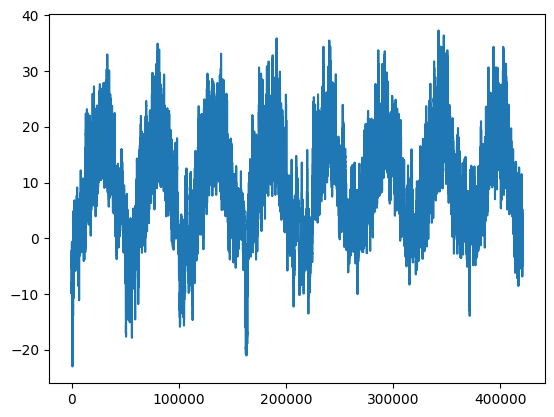

In [65]:
temp = df['T (degC)']
plt.plot(temp.index, temp)
temp.shape

In [84]:
"""
WINDOW_SIZE = 5
[
  [[1], [2], [3], [4], [5]] 
  [[2], [3], [4], [5], [6]] 
  [[3], [4], [5], [6], [7]]
]
"""
def __generate_x_y_from_temp_df(__dataframe, window_size=5):
    df_as_np = __dataframe.to_numpy()
    time_sequenced_x = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        time_sequenced_x.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(time_sequenced_x), np.array(y)

x_train_data= []
y_train_data = []

def __generate_x_y_from_2d_dataframe_using_reshaping(__temp_df, window_size=5):
    df_as_np = __temp_df.to_numpy()
    time_sequenced_x = []
    y = []
    for index in range(window_size, len(df_as_np)):
        row = df_as_np[index-window_size:index, 0]  
        label = df_as_np[index, 0]
        time_sequenced_x.append(row)
        y.append(label)
    return np.array(time_sequenced_x), np.array(y)


In [11]:
WINDOW_SIZE = 5
X1, y1 = __generate_x_y_from_temp_df(
    temp, 
    WINDOW_SIZE
)

X1.shape, y1.shape

NameError: name '__generate_x_y_from_temp_df' is not defined

In [70]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (355546, 5, 1), (355546,))

In [71]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_15 (Dense)            (None, 8)                 520       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
#The following code actually creates a directory in the currennt dir called model1 ans another one called assets inside the current model1 and saves the model there.

cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


(60000,)

In [73]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 43.6556 - root_mean_squared_error: 6.6072INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 21s 9ms/step - loss: 43.6201 - root_mean_squared_error: 6.6046 - val_loss: 0.6389 - val_root_mean_squared_error: 0.7993
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 2.7506 - root_mean_squared_error: 1.6585INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 18s 10ms/step - loss: 2.7452 - root_mean_squared_error: 1.6569 - val_loss: 0.1287 - val_root_mean_squared_error: 0.3587
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.4254 - root_mean_squared_error: 0.6523INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.4249 - root_mean_squared_error: 0.6518 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2837
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1311 - root_mean_squared_error: 0.3620INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1311 - root_mean_squared_error: 0.3620 - val_loss: 0.0621 - val_root_mean_squared_error: 0.2492
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0740 - root_mean_squared_error: 0.2720INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.0740 - root_mean_squared_error: 0.2720 - val_loss: 0.0535 - val_root_mean_squared_error: 0.2313
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0565 - root_mean_squared_error: 0.2378INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0566 - root_mean_squared_error: 0.2378 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2229
Epoch 7/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0501 - root_mean_squared_error: 0.2238INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 16s 9ms/step - loss: 0.0501 - root_mean_squared_error: 0.2238 - val_loss: 0.0489 - val_root_mean_squared_error: 0.2210
Epoch 8/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0471 - root_mean_squared_error: 0.2169INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0471 - root_mean_squared_error: 0.2169 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2182
Epoch 9/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0454 - root_mean_squared_error: 0.2131INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0454 - root_mean_squared_error: 0.2131 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2133
Epoch 10/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0444 - root_mean_squared_error: 0.2107INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.0444 - root_mean_squared_error: 0.2106 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116


In [15]:

best_lstm_model = load_model('model1/')


In [16]:
validation_predictions = best_lstm_model.predict(X_val1).flatten()
validation_results = pd.DataFrame(data={'Validation_Predictions':validation_predictions, 'Validation_Actual':y_val1})
validation_results

NameError: name 'X_val1' is not defined

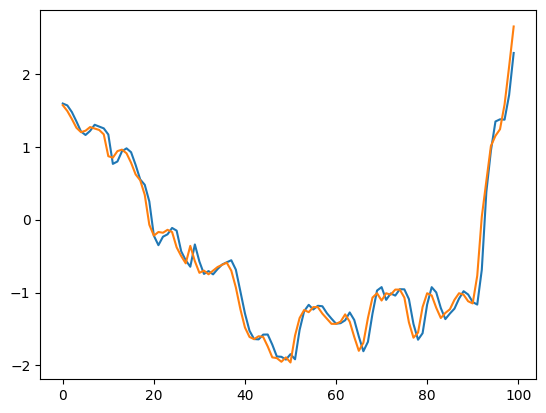

In [98]:
plt.plot(validation_results['Validation_Predictions'][:100])
plt.plot(validation_results['Validation_Actual'][:100])

In [14]:
#predictions in this case is a 2D array (1109,1)  hence need for flattening for plotting .

test_predictions = best_lstm_model.predict(X_test1)
test_results_dataframe = pd.DataFrame(data={'Test_Predictions':test_predictions.flatten(), 'Test_Actual':y_test1})
test_results_dataframe

NameError: name 'best_lstm_model' is not defined

In [100]:
test_predictions.shape

(355546, 1)

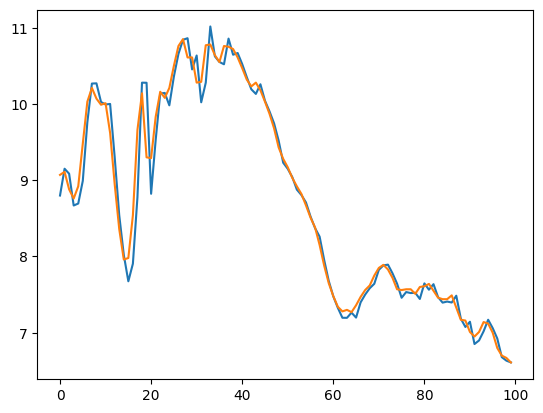

In [80]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [81]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(tempt_estimator, train_data_x, classes_y, start=0, end=100):
    predictions = model.predict(train_data_x).flatten()
    __prediction_vs_actual_df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':classes_y})
    plt.plot(__prediction_vs_actual_df['Predictions'][start:end])
    plt.plot(__prediction_vs_actual_df['Actual'][start:end])
    return df, mse(predictions, classes_y)


11111/11111 [==============================] - 39s 3ms/step


(        Predictions  Actuals
 0          8.799283     9.07
 1          9.150682     9.11
 2          9.085146     8.88
 3          8.668381     8.76
 4          8.694407     8.92
 ...             ...      ...
 355541    -3.819758    -4.05
 355542    -4.024709    -3.35
 355543    -3.168688    -3.16
 355544    -2.945913    -4.23
 355545    -4.307172    -4.82
 
 [355546 rows x 2 columns],
 0.05582073040429612)

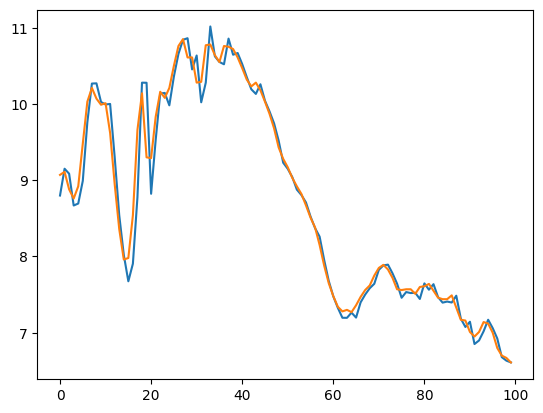

In [82]:
plot_predictions1(model1, X_test1, y_test1)